In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'gender_submission.csv']


In [2]:
%matplotlib inline
#%matplotlib notebook

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
submission = pd.read_csv('../input/gender_submission.csv')

In [4]:
train.isna().sum(), test.isna().sum()
#missing values in age, cabin & embarked

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#Visualize missing values 
import missingno as msno
import seaborn as sns


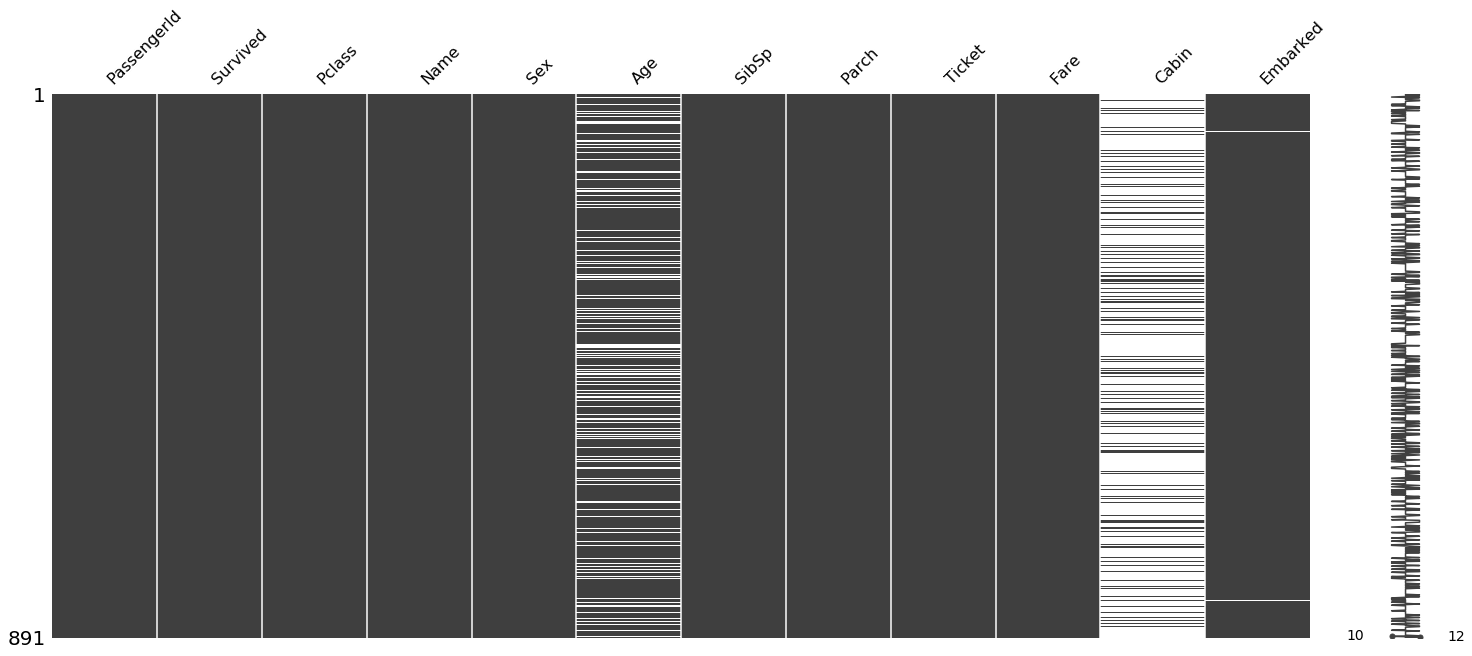

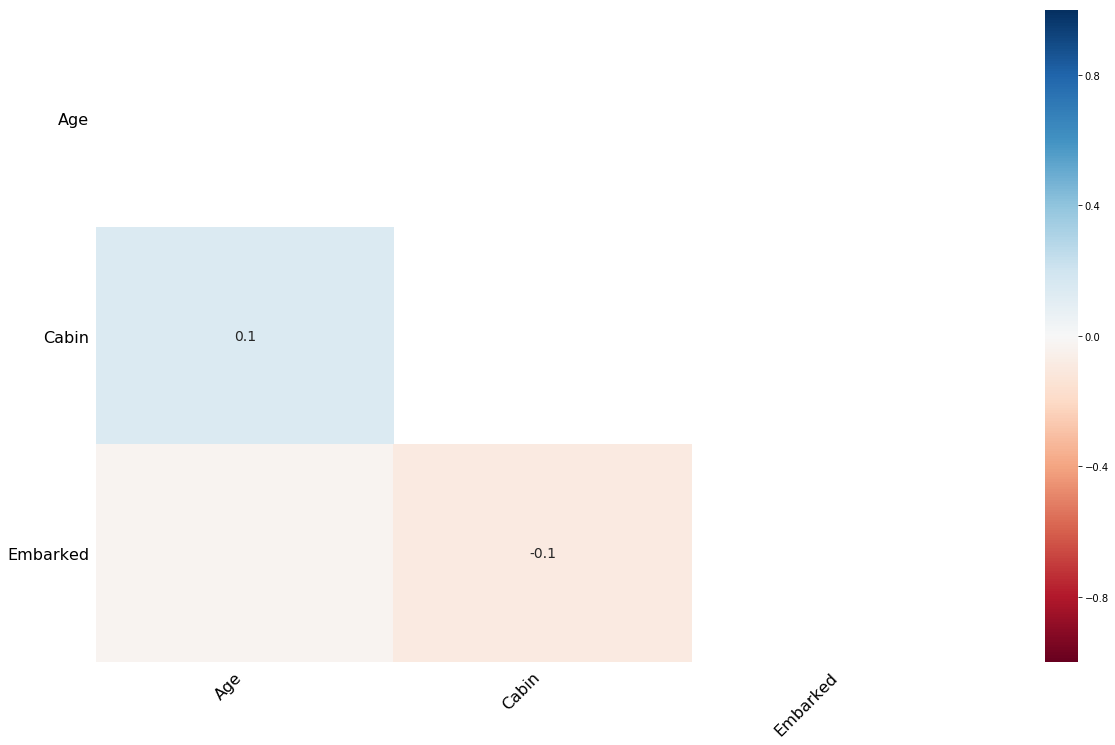

In [7]:
msno.matrix(train),
msno.heatmap(train)


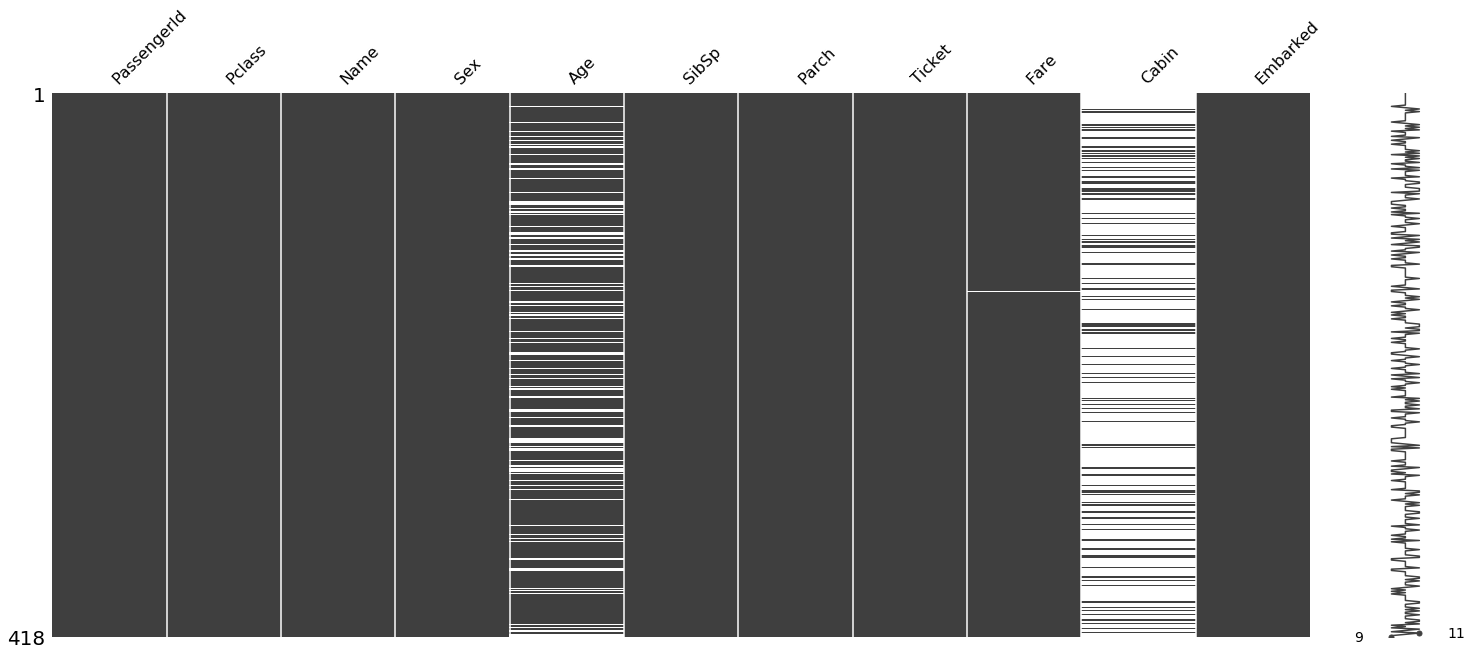

In [8]:
msno.matrix(test)

In [9]:
#check unique values
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

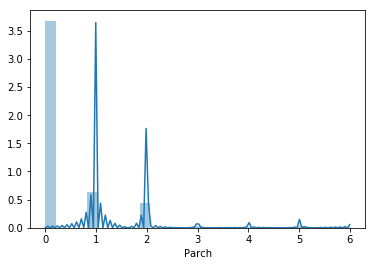

In [10]:
sns.distplot(train.Parch)

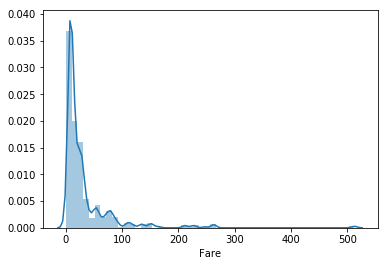

In [11]:
#check distribution of variables
sns.distplot(train.Fare)

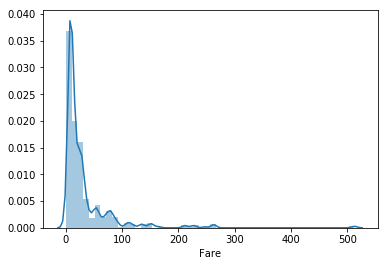

In [12]:
sns.distplot(train.Fare)

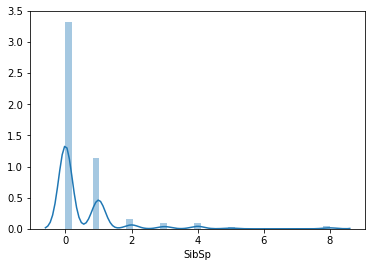

In [13]:
sns.distplot(train.SibSp)

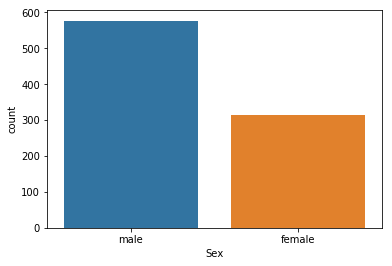

In [14]:
sns.countplot(x='Sex',data=train)

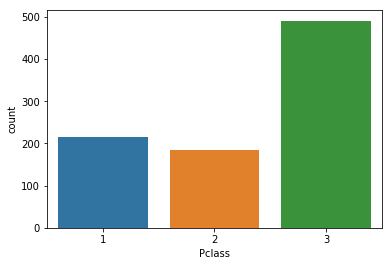

In [15]:
sns.countplot(x='Pclass',data=train)

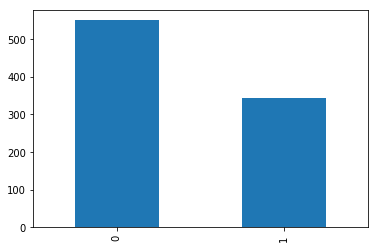

In [16]:
#Univariate analysis

train['Survived'].value_counts().plot.bar()

In [17]:
train.Survived.sum(), train.Survived.shape

(342, (891,))

In [18]:
#Multivariate analysis

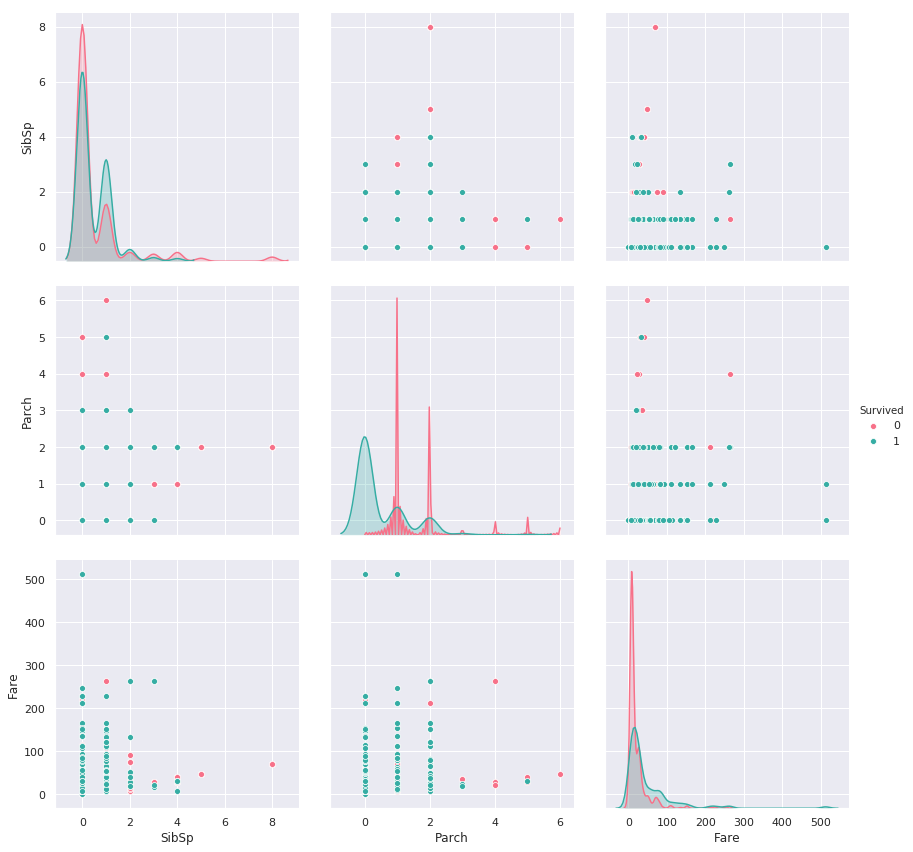

In [19]:
# Pair plot
sns.set()
cols = ['Survived','SibSp', 'Parch', 'Fare']
sns.pairplot(train[cols],height = 4 ,kind ='scatter', hue = "Survived", diag_kind = 'kde', dropna = True, 
             vars=['SibSp', 'Parch', 'Fare'],  palette="husl")
#plt.show()


In [20]:
train.groupby(['Survived']).Fare.mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [21]:
a = pd.crosstab(train.Pclass, train.Survived)
a['prob_0'] = a[0]/ (a[1]+ a[0])
a['prob_1'] = a[1]/ (a[1]+ a[0])
print(a)

Survived    0    1    prob_0    prob_1
Pclass                                
1          80  136  0.370370  0.629630
2          97   87  0.527174  0.472826
3         372  119  0.757637  0.242363


In [22]:
a = pd.crosstab(train.Sex, train.Survived)
a['prob_0'] = a[0]/ (a[1]+ a[0])
a['prob_1'] = a[1]/ (a[1]+ a[0])
print(a)

Survived    0    1    prob_0    prob_1
Sex                                   
female     81  233  0.257962  0.742038
male      468  109  0.811092  0.188908


In [23]:
a = pd.crosstab(train.Embarked, train.Survived)
a['prob_0'] = a[0]/ (a[1]+ a[0])
a['prob_1'] = a[1]/ (a[1]+ a[0])
print(a)

Survived    0    1    prob_0    prob_1
Embarked                              
C          75   93  0.446429  0.553571
Q          47   30  0.610390  0.389610
S         427  217  0.663043  0.336957


In [25]:
#combine data sets for feature engineering and imputataion

train['type'] = "train"
test['type'] = "test"
comb = pd.concat([train, test], ignore_index = True, sort = False )

In [26]:
comb.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
type              0
dtype: int64

In [27]:
comb.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [28]:
#replace embarked missing values with mode
comb['Embarked'][comb.Embarked.isnull()]= 'S'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
comb['family'] = comb['SibSp'] + comb['Parch']

In [30]:
#records with zero fares, check Pclass level values for imputation
comb[comb.Fare== 0 ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,type,family
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,train,0
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,train,0
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,train,0
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,train,0
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,train,0


In [31]:
comb.groupby(['Pclass'], as_index = False).agg({'Fare': ['mean','median'] })


Pclass       Fare         
               mean   median
0      1  87.508992  60.0000
1      2  21.179196  15.0458
2      3  13.302889   8.0500

In [32]:
comb['Fare'][comb.Fare.isnull()]= 8.0500 #since it is 3 pclass


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
comb.loc[(comb.Fare == 0)& (comb.Pclass == 1), 'Fare'] = 60
comb.loc[(comb.Fare == 0)& (comb.Pclass == 2), 'Fare'] = 15.0458
comb.loc[(comb.Fare == 0)& (comb.Pclass == 3), 'Fare'] = 8.0500

In [34]:
#fix age 

comb.Age.mean(), comb.Age.median(), comb.Age.min()

(29.881137667304014, 28.0, 0.17)

In [35]:
comb.groupby(['Pclass'], as_index = False).agg({'Age': ['mean','median'] })

#young ppl bought cheaper tickets

Pclass        Age       
               mean median
0      1  39.159930   39.0
1      2  29.506705   29.0
2      3  24.816367   24.0

In [36]:
comb.loc[(comb.Age.isnull())& (comb.Pclass == 1), 'Age'] = 39
comb.loc[(comb.Age.isnull())& (comb.Pclass == 2), 'Age'] = 29
comb.loc[(comb.Age.isnull())& (comb.Pclass == 3), 'Age'] = 24

In [37]:
#baseline model
#get dummies
df = pd.get_dummies(comb, columns = ['Pclass', 'Sex', 'Embarked'])

In [38]:
df1 = df.copy()
df1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1,inplace=True)

x = df1[df1.type == 'train']
x.drop(['Survived', 'type'], axis = 1, inplace = True)
y = df1['Survived'][df1.type == 'train']

x_final = df1[df1.type == 'test']
x_final.drop(['Survived', 'type'], axis = 1, inplace = True)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
x.shape, y.shape, x_final.shape

((891, 13), (891,), (418, 13))

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.3, random_state = 0)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime


In [45]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [46]:
#xgboost randomizsed gridsearch

# parameter grid for XGBoost
params = {
        'min_child_weight': [8, 9, 10, 11],
        'gamma': [0.3, 0.4, 0.5, 0.6],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 1.0],
        'max_depth': [2, 3, 4, 5]
        #,
        #'reg_alpha':[0.001, 0.1, 0, 10]
        }

print(params)

{'min_child_weight': [8, 9, 10, 11], 'gamma': [0.3, 0.4, 0.5, 0.6], 'subsample': [0.8, 0.9, 1.0], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 1.0], 'max_depth': [2, 3, 4, 5]}


In [47]:
xgb = XGBClassifier()

xgb_random = RandomizedSearchCV(xgb, param_distributions=params, n_iter=100, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=0 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
xgb_random.fit(x_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    4.9s



 Time taken: 0 hours 0 minutes and 10.42 seconds.


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.4s finished


In [48]:
gs_params = xgb_random.best_params_
print(gs_params)

{'subsample': 0.9, 'min_child_weight': 8, 'max_depth': 3, 'gamma': 0.4, 'colsample_bytree': 0.6}


In [49]:
y_pred = xgb_random.predict(x_test)
y_proba = xgb_random.predict_proba(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
# Model ROC
print("ROC_AUC:", metrics.roc_auc_score(y_test, y_proba[:,1]))
#Model confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8432835820895522
Precision: 0.8295454545454546
Recall: 0.73
ROC_AUC: 0.8766666666666667
Confusion matrix:
[[153  15]
 [ 27  73]]


In [50]:
import xgboost as xgb
from bayes_opt import BayesianOptimization

In [51]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [52]:
#XGB bayesian search

def xgb_evaluate(max_depth, min_child_weight, subsample, gamma, colsample_bytree):
    params = {'eval_metric': 'logloss',
              'max_depth': int(max_depth),
              'min_chil_weight': min_child_weight,
              'subsample' : subsample,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=5, metrics = 'error')    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1*cv_result['test-error-mean'].iloc[-1]
    

In [53]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'min_child_weight' : (8,11),
                                             'subsample' : (0.5,1),
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 1)}, random_state = 0)
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=5, n_iter=30, acq='ei')

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------
|  1        | -0.1733   |  0.6842   |  0.7152   |  5.411    |  9.635    |  0.7118   |
|  2        | -0.1797   |  0.7521   |  0.4376   |  6.567    |  10.89    |  0.6917   |
|  3        | -0.1765   |  0.8542   |  0.5289   |  5.272    |  10.78    |  0.5355   |
|  4        | -0.1894   |  0.361    |  0.02022  |  6.33     |  10.33    |  0.935    |
|  5        | -0.1781   |  0.985    |  0.7992   |  4.846    |  10.34    |  0.5591   |
|  6        | -0.1878   |  0.3      |  1.0      |  7.0      |  8.0      |  0.5      |
|  7        | -0.1942   |  0.3      |  1.0      |  5.915    |  10.86    |  0.5      |
|  8        | -0.1974   |  1.0      |  0.0      |  5.16     |  8.0      |  0.5      |
|  9        | -0.1749   |  1.0      |  1.0      |  6.473    |  9.078    |  1.0      |
|  10       | -0.1765   |  1.0      |  0.6201   |  6.3

In [54]:
print(xgb_bo.max)
bs_params = xgb_bo.max['params'] 

{'target': -0.1668646, 'params': {'colsample_bytree': 0.9847139237759002, 'gamma': 0.937069895544467, 'max_depth': 6.986872110015156, 'min_child_weight': 8.168527383427733, 'subsample': 0.5284711335173421}}


In [55]:
#train models on entire data using randomized grid search and bayesian optimization's best parameters

In [56]:
#randomized grid search
xgb1 = XGBClassifier(params = gs_params, random_state = 0)
xgb1.fit(x, y)
gs_output = pd.concat([df['PassengerId'][df['type']=='test'].reset_index(drop = True), pd.DataFrame(xgb1.predict(x_final))], axis = 1)
gs_output.columns = ['PassengerId','Survived']
xgb1.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'colsample_bytree': 0.6, 'gamma': 0.4, 'max_depth': 3,
                      'min_child_weight': 8, 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)>

In [57]:
#bayesian search
xgb2 = XGBClassifier(params = bs_params, random_state = 0)
xgb2.fit(x, y)
bs_output = pd.concat([df['PassengerId'][df['type']=='test'].reset_index(drop = True), pd.DataFrame(xgb2.predict(x_final))], axis = 1)
bs_output.columns = ['PassengerId','Survived']
xgb2.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'colsample_bytree': 0.9847139237759002,
                      'gamma': 0.937069895544467,
                      'max_depth': 6.986872110015156,
                      'min_child_weight': 8.168527383427733,
                      'subsample': 0.5284711335173421},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)>

In [58]:
gs_output.Survived.sum(), bs_output.Survived.sum()

(138.0, 138.0)

In [59]:
gs_output.to_csv('grids_xgb_v1.csv',index=False)
bs_output.to_csv('bayesian_xgb_v1.csv',index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 